In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import train_test_split
from keras.utils import to_categorical

import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import History 
from keras.utils import plot_model
from keras.optimizers import SGD

/Applications/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
data = pd.read_csv("/Users/constar/Downloads/voice.csv")

In [3]:
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
# split features and labels

x = data.iloc[:, :-1].values
y = data.iloc[:,-1].values

# x = data.iloc[:, :-1].values
# y = data.iloc[:,-1].values

In [5]:
# set up label encoder

gender_encoder = LabelEncoder()

y = gender_encoder.fit_transform(y) # Male = 1 Female = 0

# gender_encoder = LabelEncoder()
# y = gender_encoder.fit_transform(y) #Male = 1 ----- Female = 0 

In [6]:
#Preprocessess data

scaler = StandardScaler()
x = scaler.fit_transform(x)

# scaler = StandardScaler()
# x = scaler.fit_transform(x)

In [7]:
#Test-train split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1)

In [8]:
# Build NN

n_cols = x_train.shape[1]

y_train = to_categorical(y_train, 2)

hist = History()

model = Sequential()

model.add(Dense(1000, activation = 'relu', input_dim = n_cols))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))
model.add(Dense(1000, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 40, validation_split = .1, callbacks = [hist])

y_pred = model.predict(x_test)
y_pred = np.round(y_pred[:,1])
print(metrics.accuracy_score(y_pred, y_test))

Train on 2565 samples, validate on 286 samples
Epoch 1/40
2565/2565 [==============================] - 4s 2ms/step - loss: 0.1578 - acc: 0.9446 - val_loss: 0.0566 - val_acc: 0.9825
Epoch 2/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0672 - acc: 0.9774 - val_loss: 0.0511 - val_acc: 0.9895
Epoch 3/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0609 - acc: 0.9782 - val_loss: 0.0515 - val_acc: 0.9860
Epoch 4/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0505 - acc: 0.9825 - val_loss: 0.0746 - val_acc: 0.9860
Epoch 5/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0604 - acc: 0.9770 - val_loss: 0.0446 - val_acc: 0.9755
Epoch 6/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0416 - acc: 0.9813 - val_loss: 0.0483 - val_acc: 0.9895
Epoch 7/40
2565/2565 [==============================] - 3s 1ms/step - loss: 0.0465 - acc: 0.9828 - val_loss: 0.0489 - val_acc: 0.9895
Epoch 8/40
2565

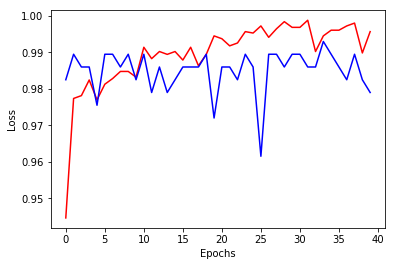

In [10]:
plt.plot(hist.history['acc'], color = 'red')
plt.plot(hist.history['val_acc'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()